# Reproducible research project
Authors:
Zuzanna Miazio
Filip Szymański
Kacper Sokołowski

In [57]:
# Imports
import numpy as np 
import pandas as pd 
from pathlib import Path
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Settings
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

In [58]:
data_path = Path.cwd() / "data/bank_data_prediction_task.csv"
df = pd.read_csv(data_path)

In [59]:
df_raw = df.copy()

### Initial data inspection

In [60]:
df.sample(10).head(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
28797,28798,32,technician,single,university.degree,no,no,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.40,NaN,-36.10,4.97,5228.10,no,control group
6848,6849,39,admin.,married,university.degree,no,no,no,cellular,jul,fri,743.00,13.00,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes,campaign group
38905,38906,27,admin.,single,university.degree,no,no,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-2.90,92.20,-31.40,0.88,5076.20,yes,control group
31455,31456,51,services,divorced,high.school,no,no,no,NaN,NaN,NaN,NaN,NaN,999,1,failure,-0.10,93.20,-42.00,4.15,5195.80,no,control group
26817,26818,54,retired,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,control group
32886,32887,55,technician,single,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-0.10,93.20,-42.00,4.02,5195.80,no,control group
20272,20273,40,technician,married,professional.course,unknown,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,control group
25630,25631,24,technician,single,basic.6y,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no,control group
33493,33494,51,admin.,single,university.degree,no,yes,yes,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.80,93.08,-47.10,1.45,5099.10,no,control group
32082,32083,58,management,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-0.10,93.20,-42.00,4.12,5195.80,no,control group


### renaming dataset columns 

In [61]:
df = df.rename(columns={df.columns[0]: 'client_id'})

In [62]:
colnames_to_change = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "nr.employed"]
dict = {}

for col in colnames_to_change:
    new = col.replace(".", "_")
    dict[col] = new
    
df = df.rename(columns = dict)

### Data description


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          41188 non-null  int64  
 1   age                41188 non-null  int64  
 2   job                41188 non-null  object 
 3   marital            41188 non-null  object 
 4   education          41188 non-null  object 
 5   default            41188 non-null  object 
 6   housing            41188 non-null  object 
 7   loan               41188 non-null  object 
 8   contact            16476 non-null  object 
 9   month              16476 non-null  object 
 10  day_of_week        16476 non-null  object 
 11  duration           16476 non-null  float64
 12  campaign           16476 non-null  float64
 13  pdays              41188 non-null  int64  
 14  previous           41188 non-null  int64  
 15  poutcome           41188 non-null  object 
 16  emp_var_rate       411

In [64]:
df['test_control_flag'].value_counts()

control group     24712
campaign group    16476
Name: test_control_flag, dtype: int64

In [65]:
df['cons_price_idx'].value_counts()

93.99    7719
93.92    6643
92.89    5762
93.44    5147
94.47    4353
93.20    3588
93.08    2440
92.20     764
92.96     709
92.43     444
92.65     356
94.22     311
94.20     301
92.84     281
92.38     265
93.37     260
94.03     231
94.06     227
93.88     211
94.60     204
92.47     176
92.71     172
93.75     172
94.77     127
93.80      66
92.76       9
Name: cons_price_idx, dtype: int64

In [66]:
null_cons_price_idx = df[df['cons_price_idx'].isnull()]
null_cons_price_idx['test_control_flag'].value_counts()

control group    250
Name: test_control_flag, dtype: int64

In [67]:
df['cons_price_idx'].fillna(df['cons_price_idx'].median(), inplace=True)

In [68]:
df.describe()

,client_id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00,41188.00,16476.00,16476.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,20594.50,40.02,259.66,2.55,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,11890.10,10.42,260.66,2.70,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,1.00,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,10297.75,32.00,103.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,20594.50,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,30891.25,47.00,321.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,41188.00,98.00,4918.00,43.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [69]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,test_control_flag
count,41188,41188,41188,41188,41188,41188,16476,16476,16476,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no,control group
freq,10422,24928,12168,32588,21576,33950,10481,5497,3522,35563,36020,24712


In [70]:
df['test_control_flag'].value_counts()

control group     24712
campaign group    16476
Name: test_control_flag, dtype: int64

In [71]:
df['pdays'].replace(999, np.nan, inplace = True)

In [72]:
temp_df = df.drop(['client_id'], axis=1)
temp_df.duplicated().sum()


2306

In [73]:
duplicates = temp_df[temp_df.duplicated(keep=False)]
display(duplicates)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,test_control_flag
496,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
497,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
10057,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group
10069,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group
16480,59,admin.,married,professional.course,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,control group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40713,41,entrepreneur,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,0,nonexistent,-1.70,94.03,-38.30,0.90,4991.60,yes,control group
40912,33,technician,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,1,failure,-1.10,94.20,-37.50,0.88,4963.60,no,control group
40916,33,technician,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,1,failure,-1.10,94.20,-37.50,0.88,4963.60,no,control group
40954,35,technician,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,2,failure,-1.10,94.20,-37.50,0.88,4963.60,no,control group


In [74]:
duplicates['test_control_flag'].value_counts()

control group     4142
campaign group       4
Name: test_control_flag, dtype: int64

In [75]:
duplicates[duplicates['test_control_flag'] == 'campaign group']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,test_control_flag
496,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
497,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
10057,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group
10069,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group


In [76]:
columns_to_check = df.columns[df.columns != 'client_id']
df.drop_duplicates(subset = columns_to_check, keep='first', inplace=True)

In [77]:
df.duplicated().sum()

0

### Visualisations

In [78]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[np.object_]).columns.tolist()

__Distributions of categorical variables__

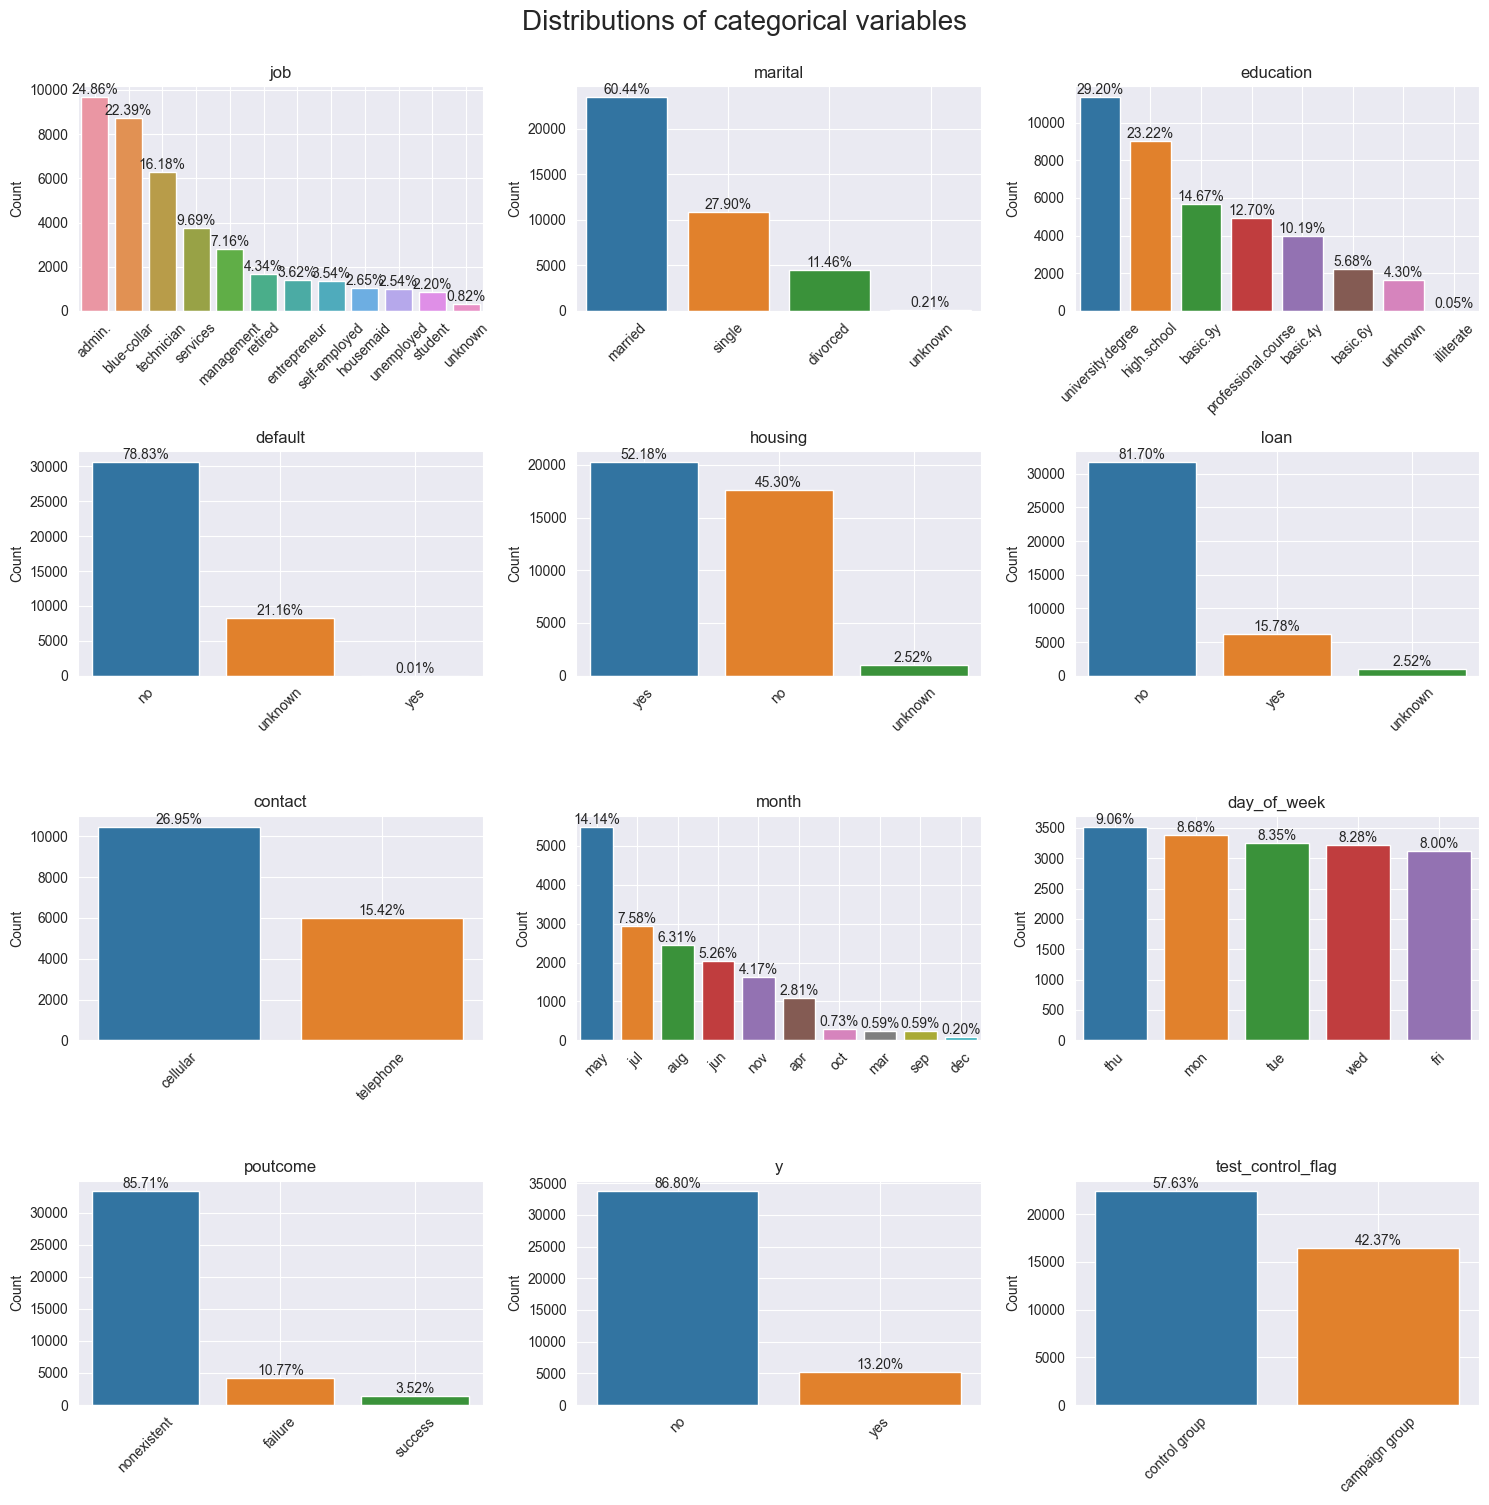

In [79]:
num_cols = 3
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

for i, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=df[i], ax=ax, order=df[i].value_counts().index)
    ax.set_title(f"{i}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

    total = float(len(df[i]))
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{(height/total)*100:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom')

plt.suptitle('Distributions of categorical variables', size=20, y=1)
plt.tight_layout()
plt.show()

__The distribution of target 'y' across categorical variables with corresponding percentage value__

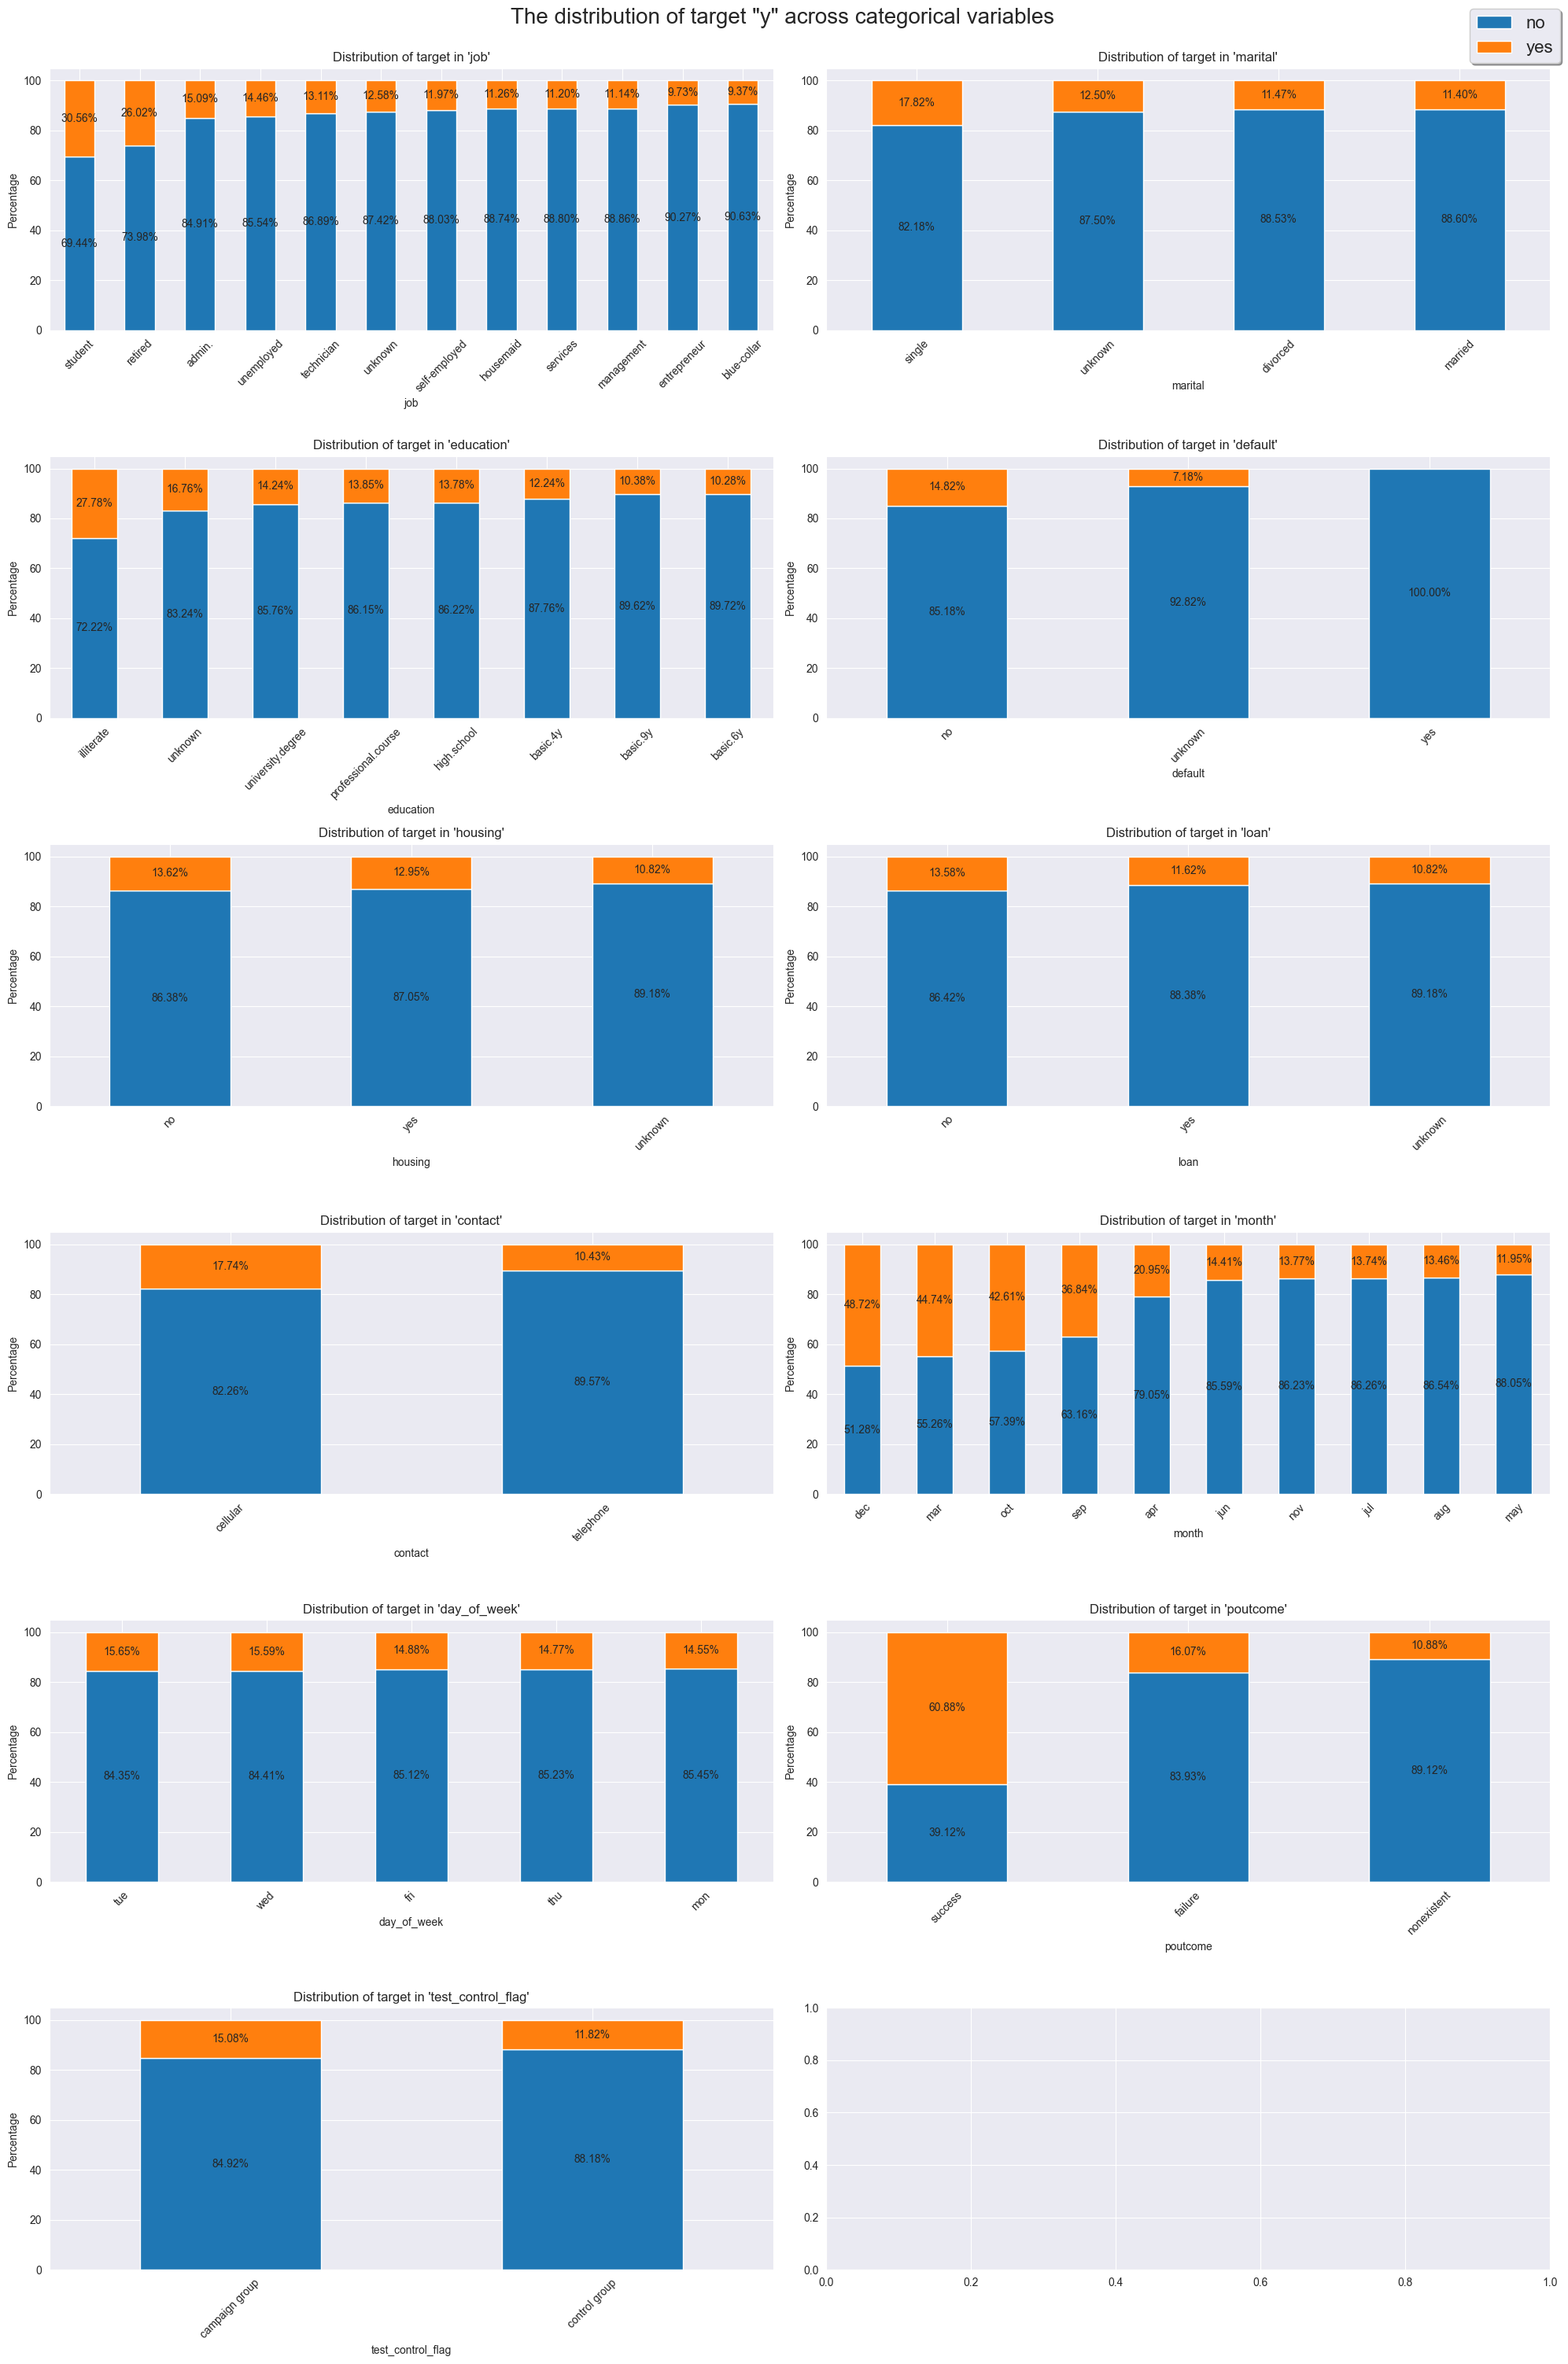

In [80]:
categorical_cols_temp = [col for col in categorical_cols if col != 'y']

num_cols = 2
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30))

for i, category in enumerate(categorical_cols_temp):

    category_distribution = df.groupby(category)['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    category_distribution = category_distribution.sort_values(by='yes', ascending=False)
    
    row = i // num_cols
    col = i % num_cols

    ax = category_distribution.plot(kind='bar', stacked=True, ax=axes[row, col])
    ax.set_title(f"Distribution of target in '{category}'")
    ax.set_xlabel(category)
    ax.set_ylabel('Percentage')
    ax.legend().remove()
    ax.tick_params(axis='x', rotation=45)
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, prop={'size': 16})

plt.suptitle('The distribution of target "y" across categorical variables', size=20, y=1)
plt.tight_layout()
plt.show()

### Comparative analysis between campaign and control

In [81]:
campaign_group = df_raw[df_raw['test_control_flag'] == 'campaign group']
control_group = df_raw[df_raw['test_control_flag'] == 'control group']

In [82]:
conversion_rate_campaign = campaign_group['y'].value_counts(normalize=True)['yes']
conversion_rate_control = control_group['y'].value_counts(normalize=True)['yes']
lift = (conversion_rate_campaign - conversion_rate_control) / conversion_rate_campaign

print(f"Conversion rate for campaign group: {conversion_rate_campaign:.2%}")
print(f"Conversion rate for control group: {conversion_rate_control:.2%}")
print(f"Lift: {lift:.2%}")

Conversion rate for campaign group: 15.08%
Conversion rate for control group: 10.86%
Lift: 27.96%


The following conversion rates mean that 15.08% of the entire campaign group and only 10.86% of the entire control group responded 'yes'
The lift of the current campaign is 27.96%, indicating that the campaign increased the conversion rate by approximately 28% compared to the control group.

In [83]:
campaign_group = df[df['test_control_flag'] == 'campaign group']
control_group = df[df['test_control_flag'] == 'control group']

In [84]:
campaign_group.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1, inplace=True)
control_group.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1, inplace=True)

__Comparison of categorical variable distributions between campaign and control groups__

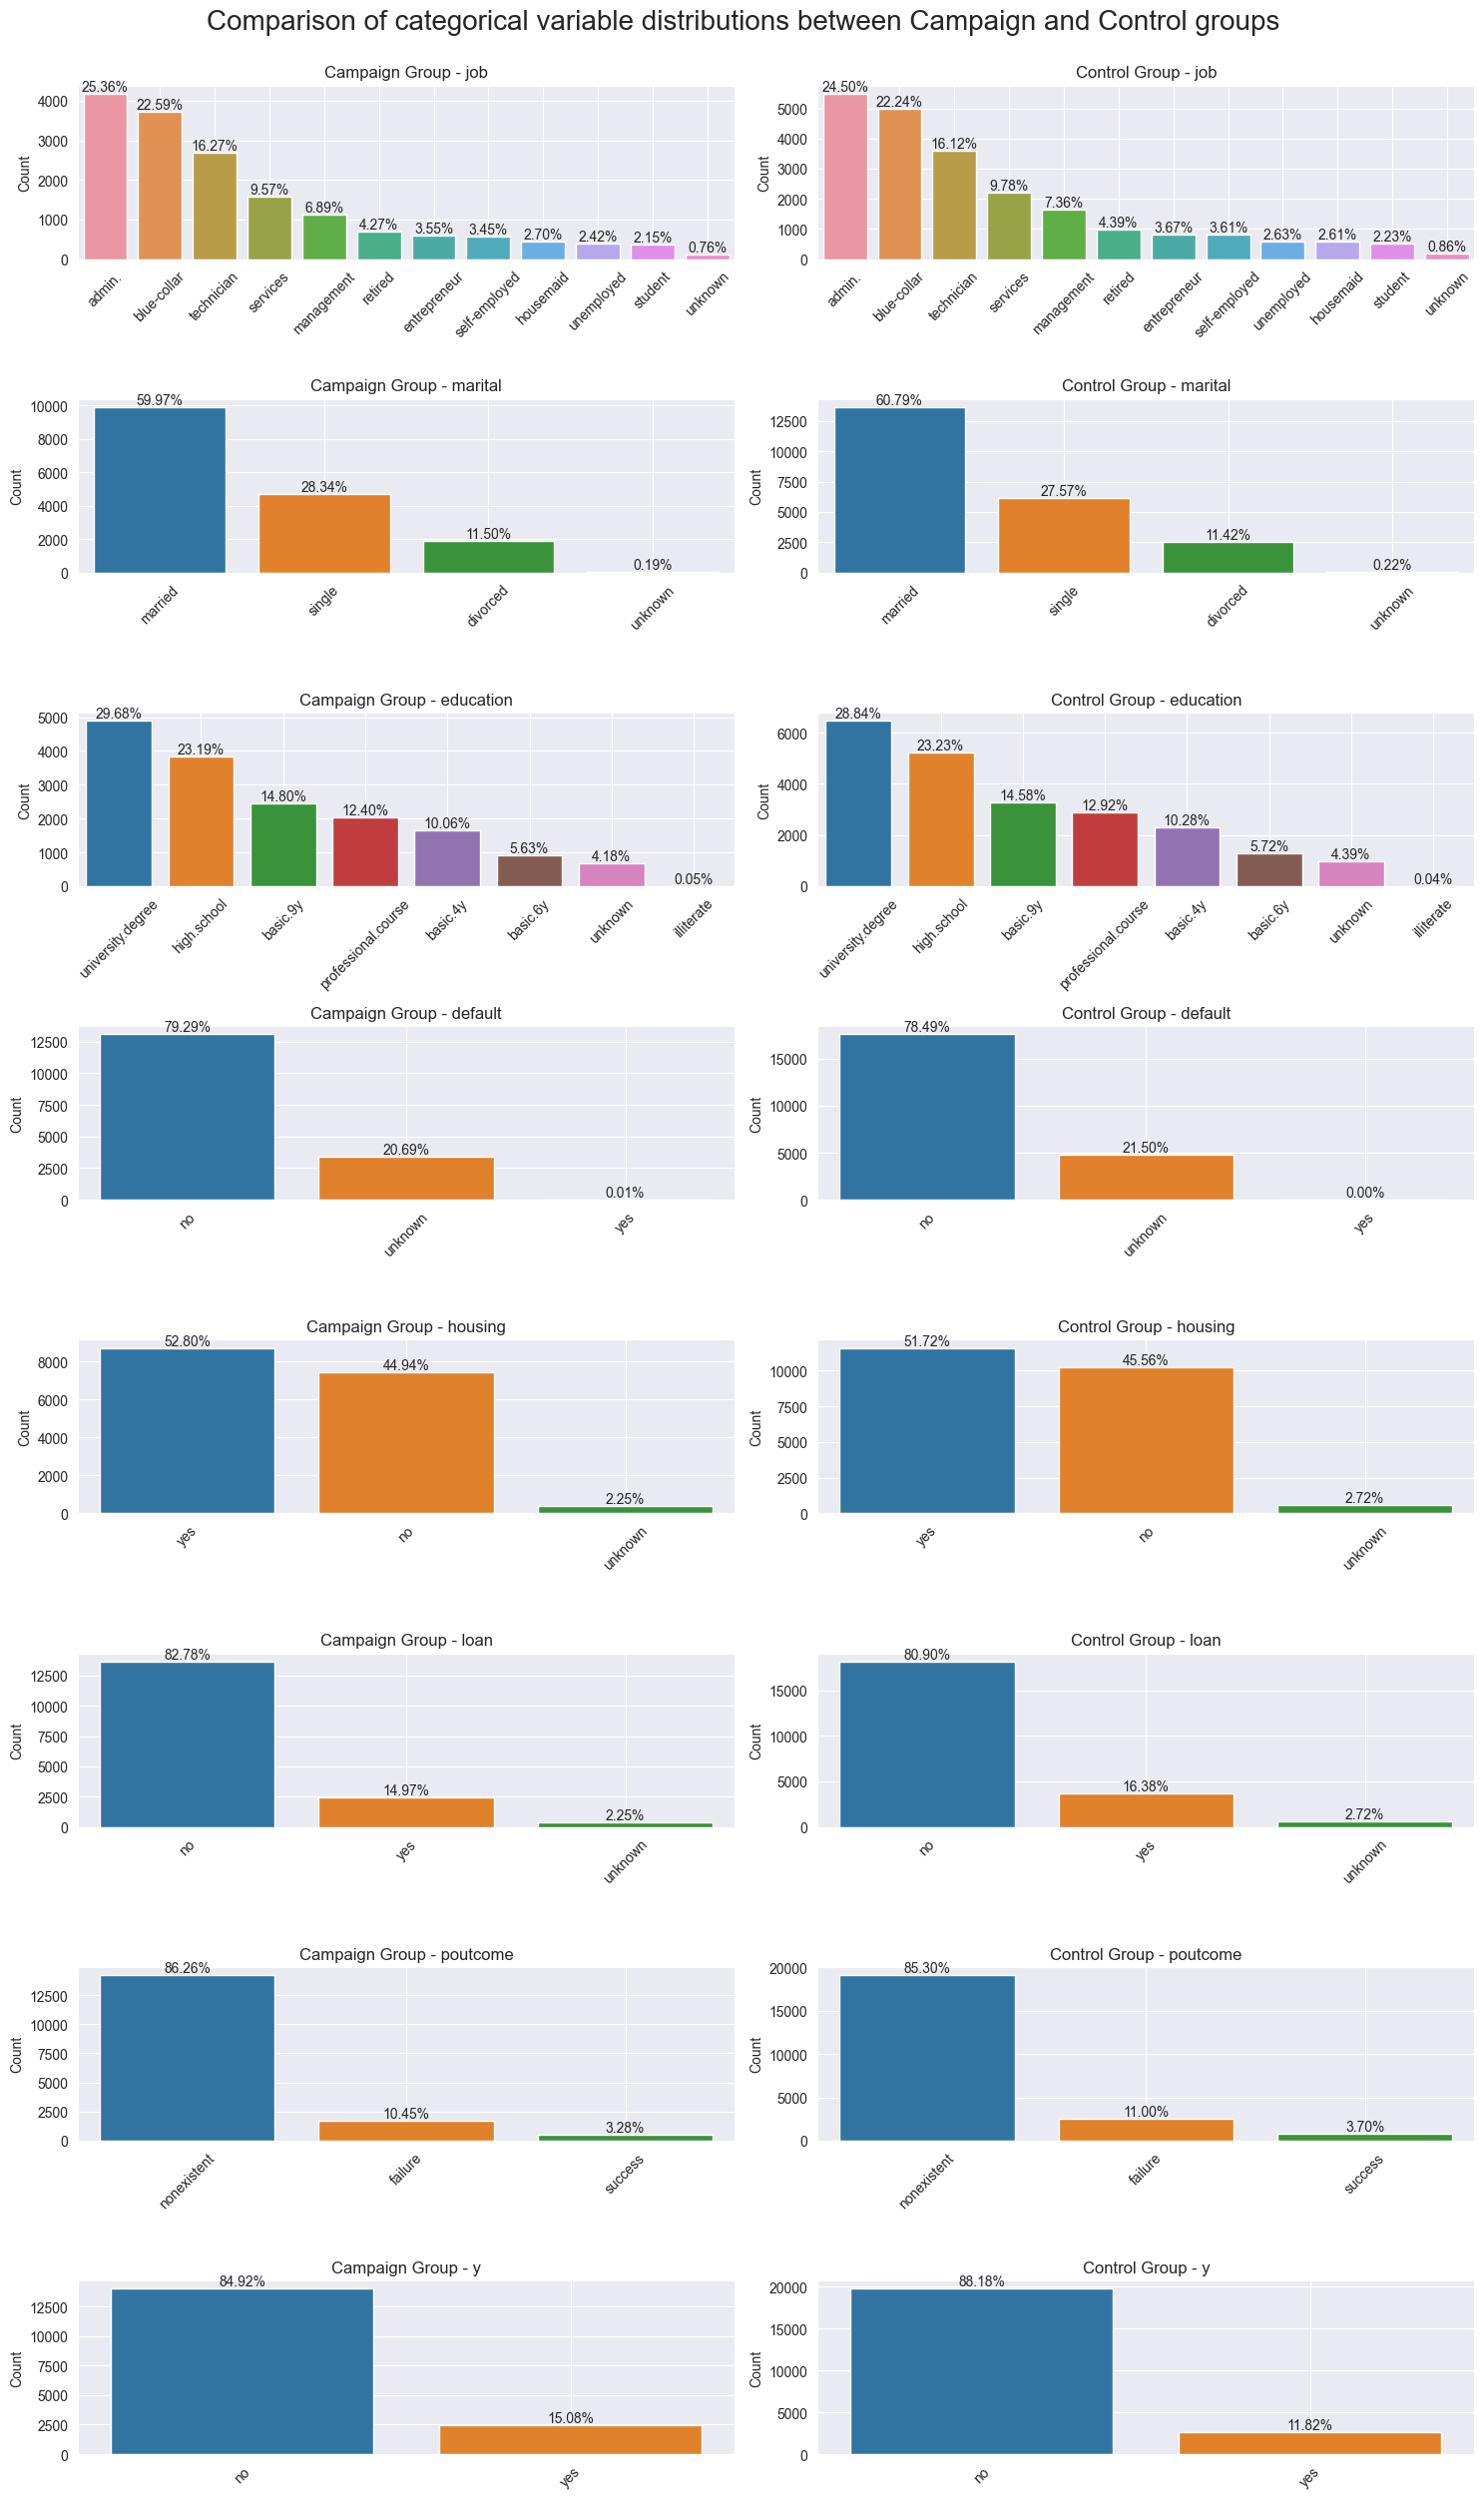

In [85]:
calegorical_cols_campaign_control = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

num_rows = len(calegorical_cols_campaign_control) 
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 25))

for i, col in enumerate(calegorical_cols_campaign_control):
    sns.countplot(x=col, data=campaign_group, ax=axes[i, 0], order=campaign_group[col].value_counts().index)
    axes[i, 0].set_title(f"Campaign Group - {col}")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].grid(True)
    
    total_campaign = float(len(campaign_group[col]))
    for p in axes[i, 0].patches:
        height = p.get_height()
        axes[i, 0].annotate(f'{(height/total_campaign)*100:.2f}%', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom')

    sns.countplot(x=col, data=control_group, ax=axes[i, 1], order=control_group[col].value_counts().index)
    axes[i, 1].set_title(f"Control Group - {col}")
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].grid(True)
    
    total_control = float(len(control_group[col]))
    for p in axes[i, 1].patches:
        height = p.get_height()
        axes[i, 1].annotate(f'{(height/total_control)*100:.2f}%', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom')

plt.suptitle('Comparison of categorical variable distributions between Campaign and Control groups', size=20, y=1)
plt.tight_layout()
plt.show()

__Comparison of target 'y' distribution across categorical variables between Campaign and Control groups__

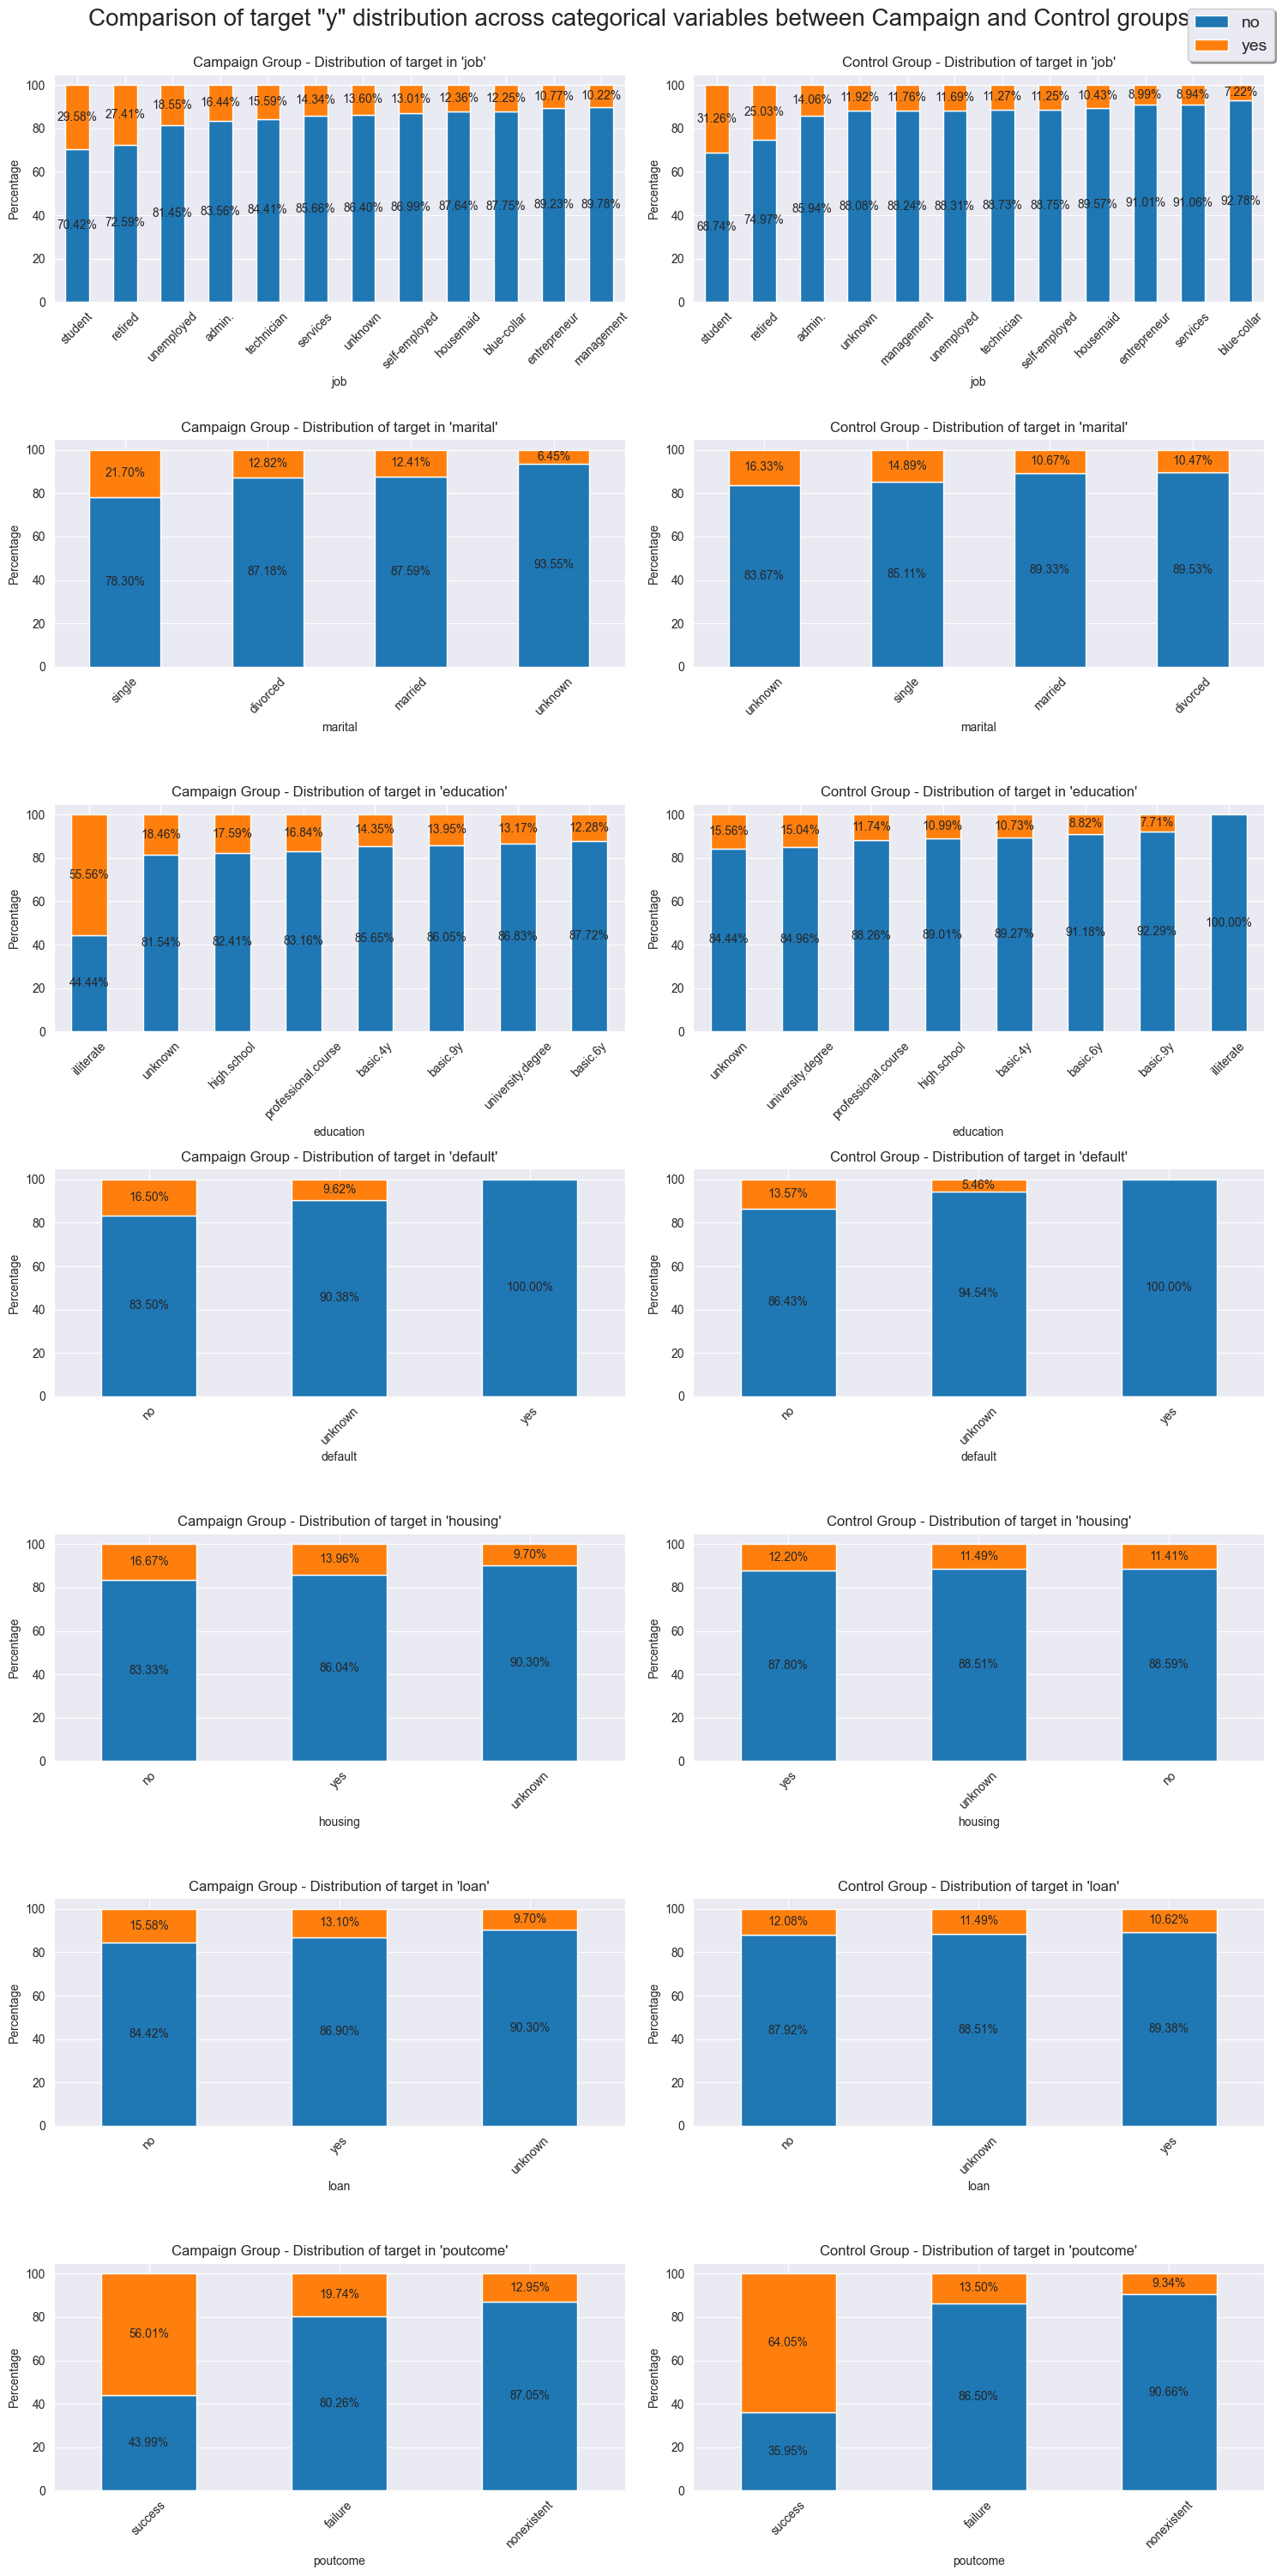

In [86]:
calegorical_cols_campaign_control_temp = [col for col in calegorical_cols_campaign_control if col != 'y']

num_cols = 2  
num_rows = (len(calegorical_cols_campaign_control_temp))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

for i, category in enumerate(calegorical_cols_campaign_control_temp):
    # Calculate distribution for campaign group
    campaign_distribution = campaign_group.groupby(category)['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    campaign_distribution = campaign_distribution.sort_values(by='yes', ascending=False)
    
    # Calculate distribution for control group
    control_distribution = control_group.groupby(category)['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    control_distribution = control_distribution.sort_values(by='yes', ascending=False)
    
    # Plotting for campaign group in the current row
    ax_campaign = campaign_distribution.plot(kind='bar', stacked=True, ax=axes[i, 0])
    ax_campaign.set_title(f"Campaign Group - Distribution of target in '{category}'")
    ax_campaign.set_xlabel(category)
    ax_campaign.set_ylabel('Percentage')
    ax_campaign.legend().remove()
    ax_campaign.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on each bar for campaign group
    for p in ax_campaign.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax_campaign.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

    # Plotting for control group in the current row
    ax_control = control_distribution.plot(kind='bar', stacked=True, ax=axes[i, 1])
    ax_control.set_title(f"Control Group - Distribution of target in '{category}'")
    ax_control.set_xlabel(category)
    ax_control.set_ylabel('Percentage')
    ax_control.legend().remove()
    ax_control.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on each bar for control group
    for p in ax_control.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax_control.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Add a single legend outside the subplots at the top
handles, labels = ax_campaign.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, prop={'size': 14})

plt.suptitle('Comparison of target "y" distribution across categorical variables between Campaign and Control groups', size=20, y=1)
plt.tight_layout()
plt.show()

#### Comparison of numerical variable distribution between Campaign and Control groups by target 'y'

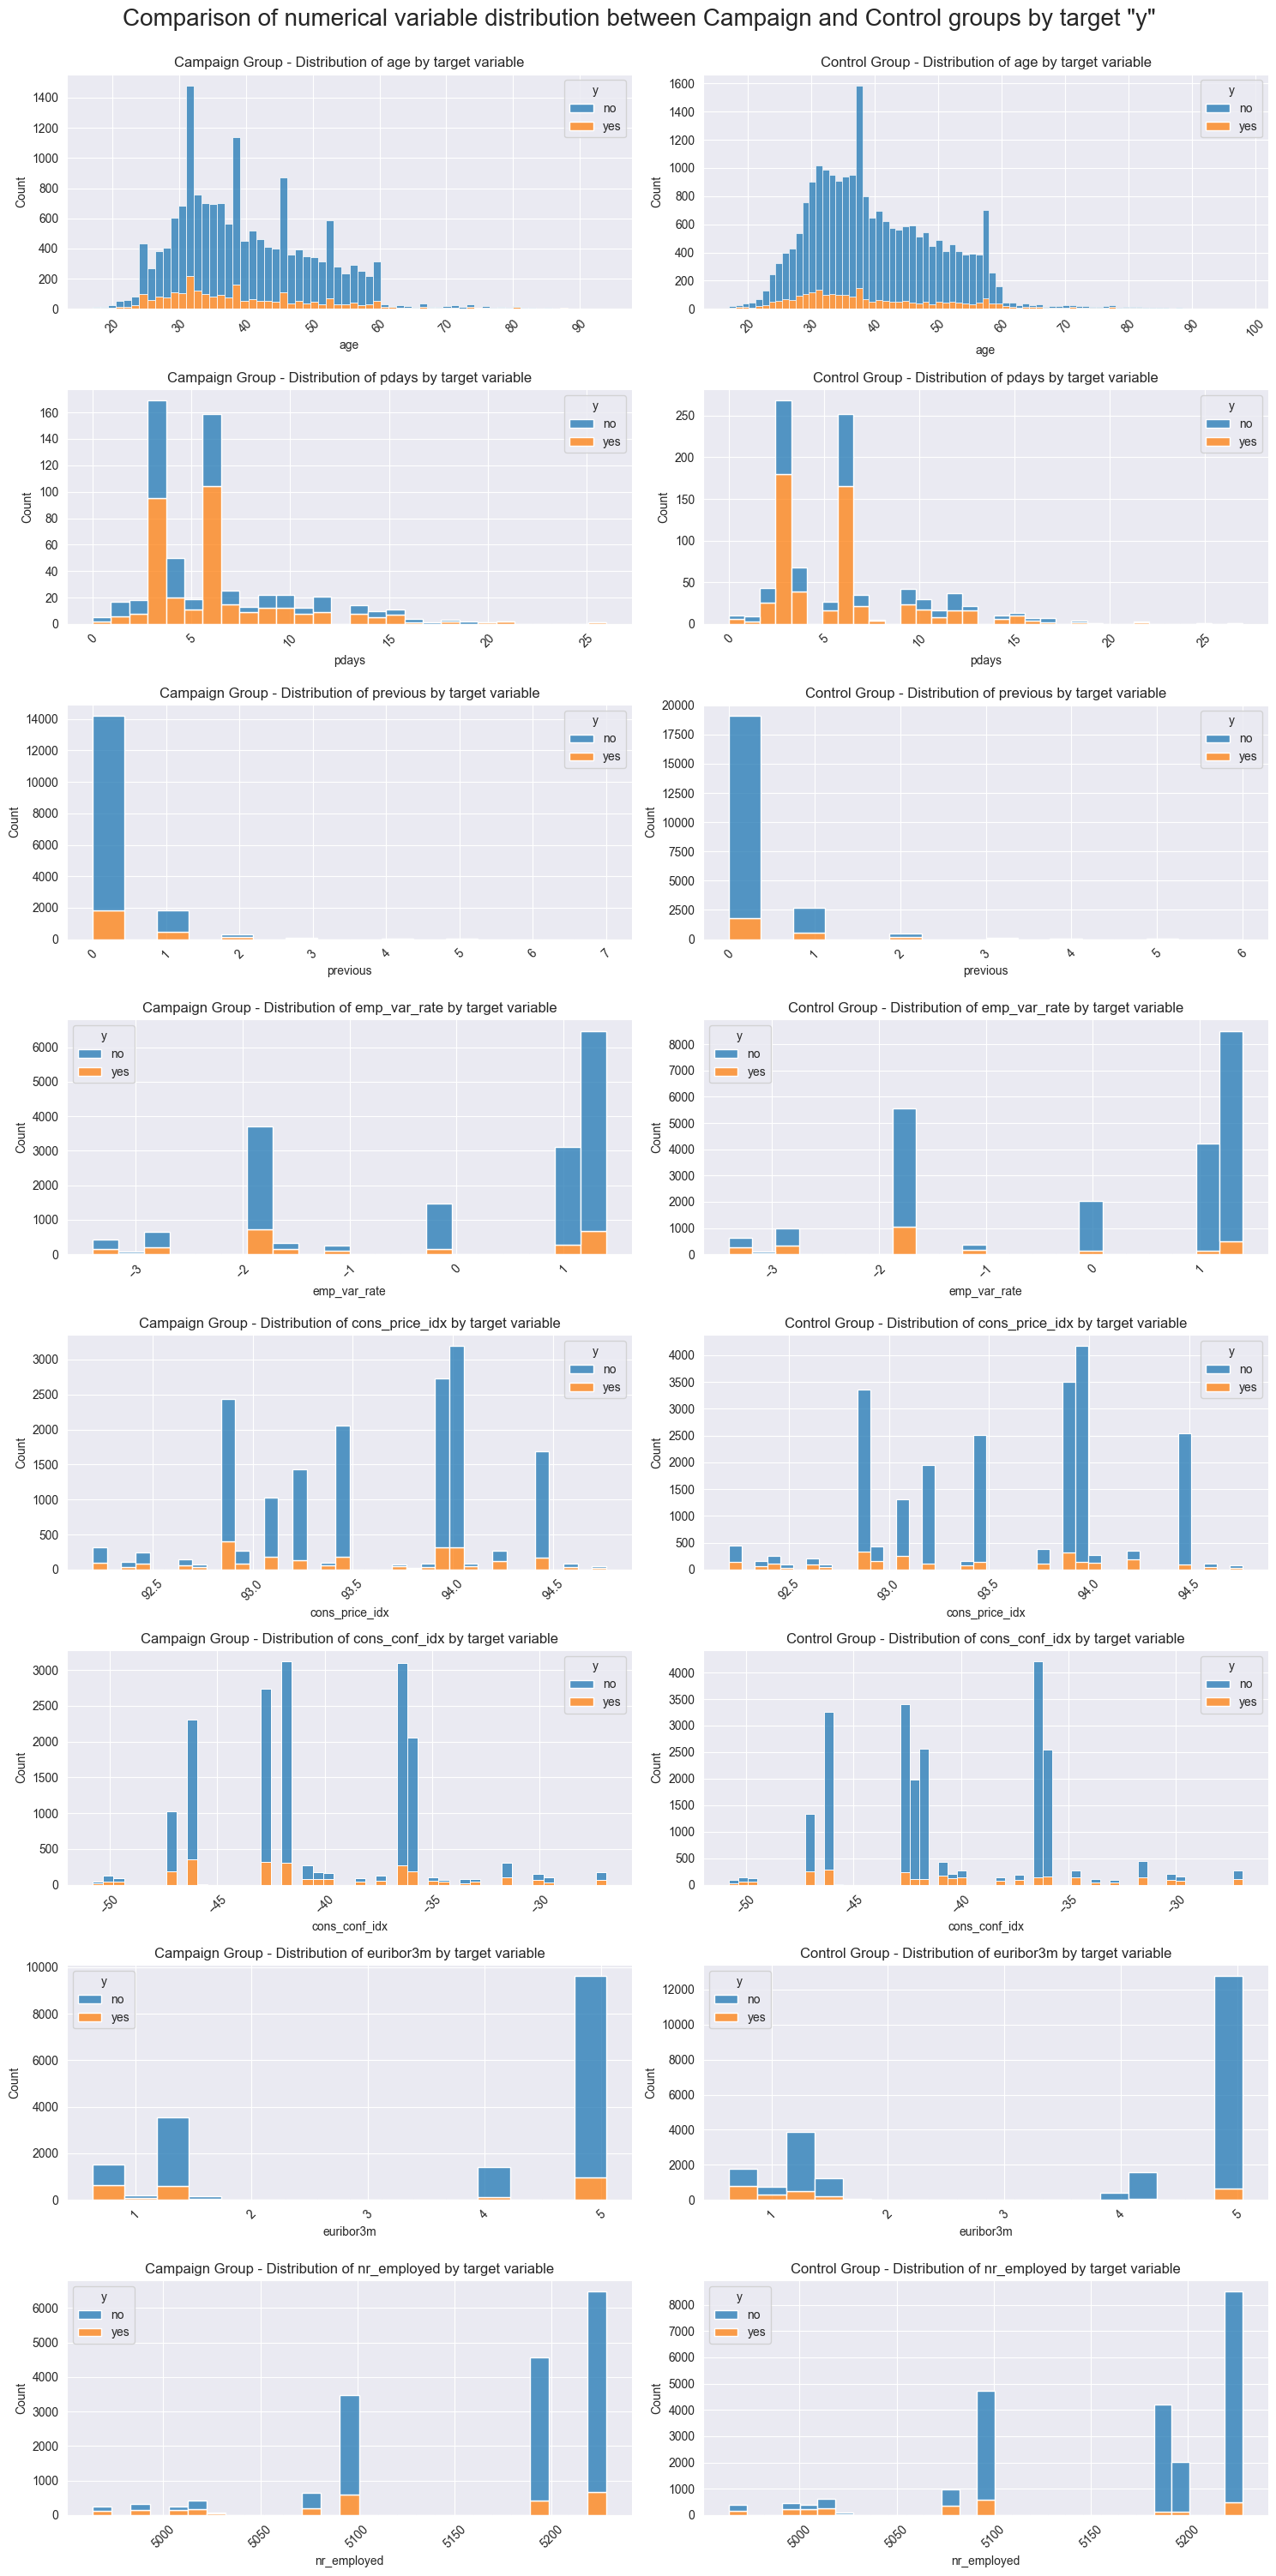

In [87]:
numeric_cols_campaign_control =  ['age', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

num_cols = 2  
num_rows = (len(numeric_cols_campaign_control))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

for i, ax_row in enumerate(axes):
    # Campaign group 
    sns.histplot(data=campaign_group, x=numeric_cols_campaign_control[i], hue='y', multiple='stack', ax=ax_row[0])
    ax_row[0].set_title(f"Campaign Group - Distribution of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[0].set_xlabel(numeric_cols_campaign_control[i])
    ax_row[0].set_ylabel('Count')
    ax_row[0].tick_params(axis='x', rotation=45)

    # Control group 
    sns.histplot(data=control_group, x=numeric_cols_campaign_control[i], hue='y', multiple='stack', ax=ax_row[1])
    ax_row[1].set_title(f"Control Group - Distribution of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[1].set_xlabel(numeric_cols_campaign_control[i])
    ax_row[1].set_ylabel('Count')
    ax_row[1].tick_params(axis='x', rotation=45)

plt.suptitle('Comparison of numerical variable distribution between Campaign and Control groups by target "y"', size=20, y=1)
plt.tight_layout()
plt.show()


#### Comparison of boxplots between Campaign and Control groups by target 'y'

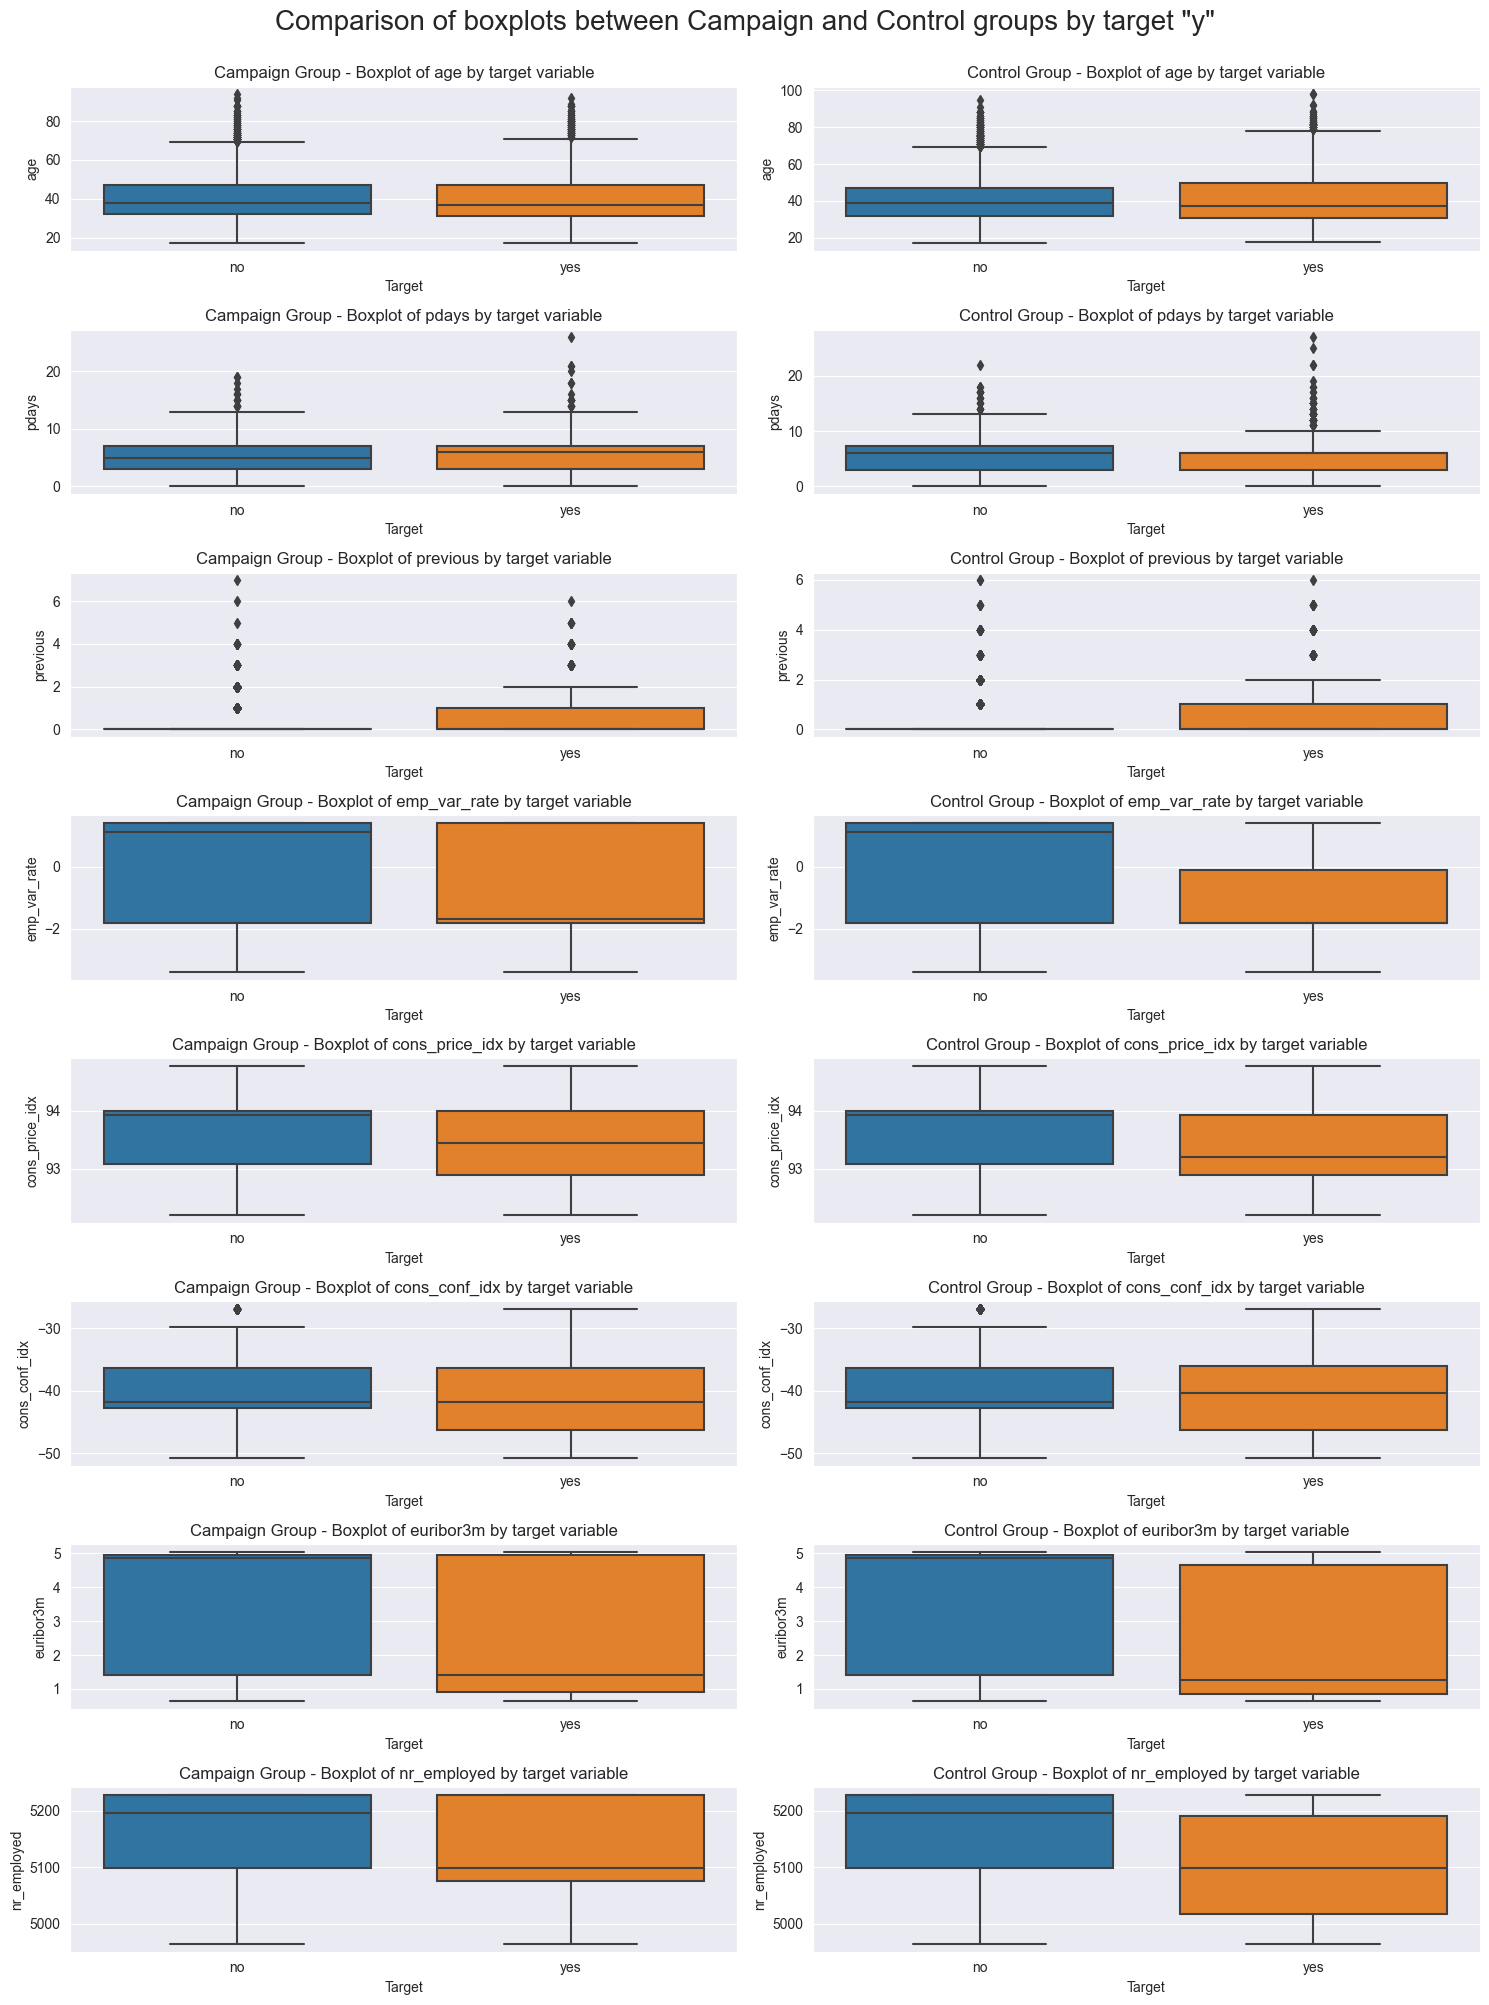

In [88]:
num_cols = 2  
num_rows = (len(numeric_cols_campaign_control))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, ax_row in enumerate(axes):
    sns.boxplot(data=campaign_group, x='y', y=numeric_cols_campaign_control[i], ax=ax_row[0])
    ax_row[0].set_title(f"Campaign Group - Boxplot of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[0].set_xlabel('Target')
    ax_row[0].set_ylabel(numeric_cols_campaign_control[i])

    sns.boxplot(data=control_group, x='y', y=numeric_cols_campaign_control[i], ax=ax_row[1])
    ax_row[1].set_title(f"Control Group - Boxplot of {numeric_cols_campaign_control[i]} by target variable")
    ax_row[1].set_xlabel('Target')
    ax_row[1].set_ylabel(numeric_cols_campaign_control[i])

plt.suptitle('Comparison of boxplots between Campaign and Control groups by target "y"', size=20, y=1)
plt.tight_layout()
plt.show()


It is hard to retrieve information about the disribution of age by target variable from the histogram. Let's bucketize it based on quartiles.

In [89]:
age_quantiles = np.quantile(df['age'], [0, 0.25, 0.5, 0.75, 1.0])
print(age_quantiles)

[17. 32. 38. 47. 98.]


In [90]:
bins = [17, 32, 47, 70, 98]
labels = ['[17, 32]', '(32, 47]', '(47, 70]', '(70, 98]']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [91]:
campaign_group['age'].describe()

count   16474.00
mean       39.99
std        10.49
min        17.00
25%        32.00
50%        38.00
75%        47.00
max        94.00
Name: age, dtype: float64

In [92]:
bins = [0, 32, 47, 70, 94]
labels = ['[0, 32]', '(32, 47]', '(47, 70]', '(70, 94]']

campaign_group['age'] = pd.cut(campaign_group['age'], bins=bins, labels=labels, right=False)

In [93]:
control_group['age'].describe()

count   22408.00
mean       40.28
std        10.49
min        17.00
25%        32.00
50%        38.00
75%        47.00
max        98.00
Name: age, dtype: float64

In [94]:
bins = [0, 32, 47, 70, 98]
labels = ['[0, 32]', '(32, 47]', '(47, 70]', '(70, 98]']
control_group['age'] = pd.cut(control_group['age'], bins=bins, labels=labels, right=False)

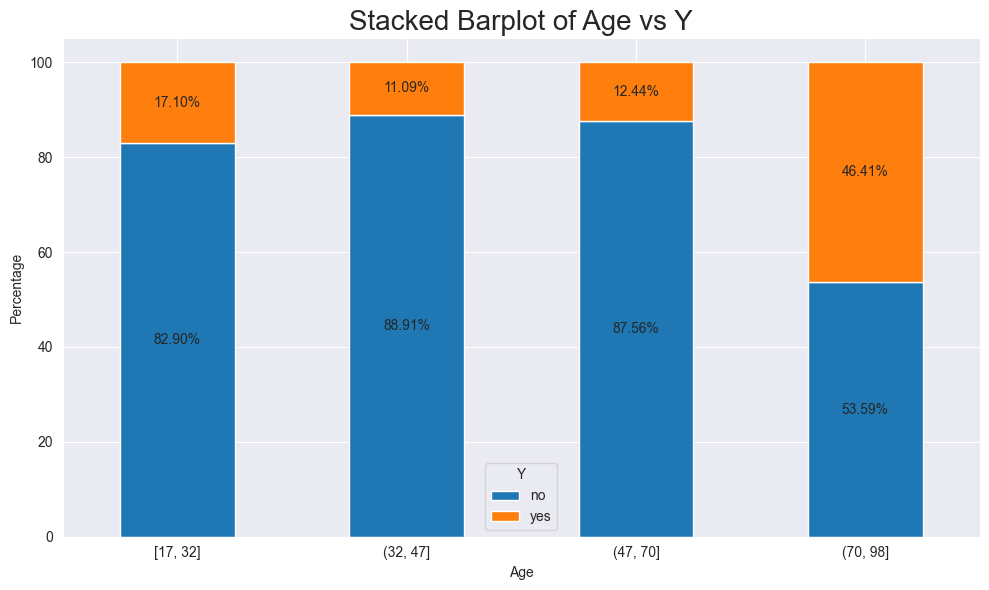

In [95]:
category_distribution = df.groupby('age')['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)

ax = category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Barplot of Age vs Y', size = 20)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Y')
plt.xticks(rotation=0)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout() 
plt.show()

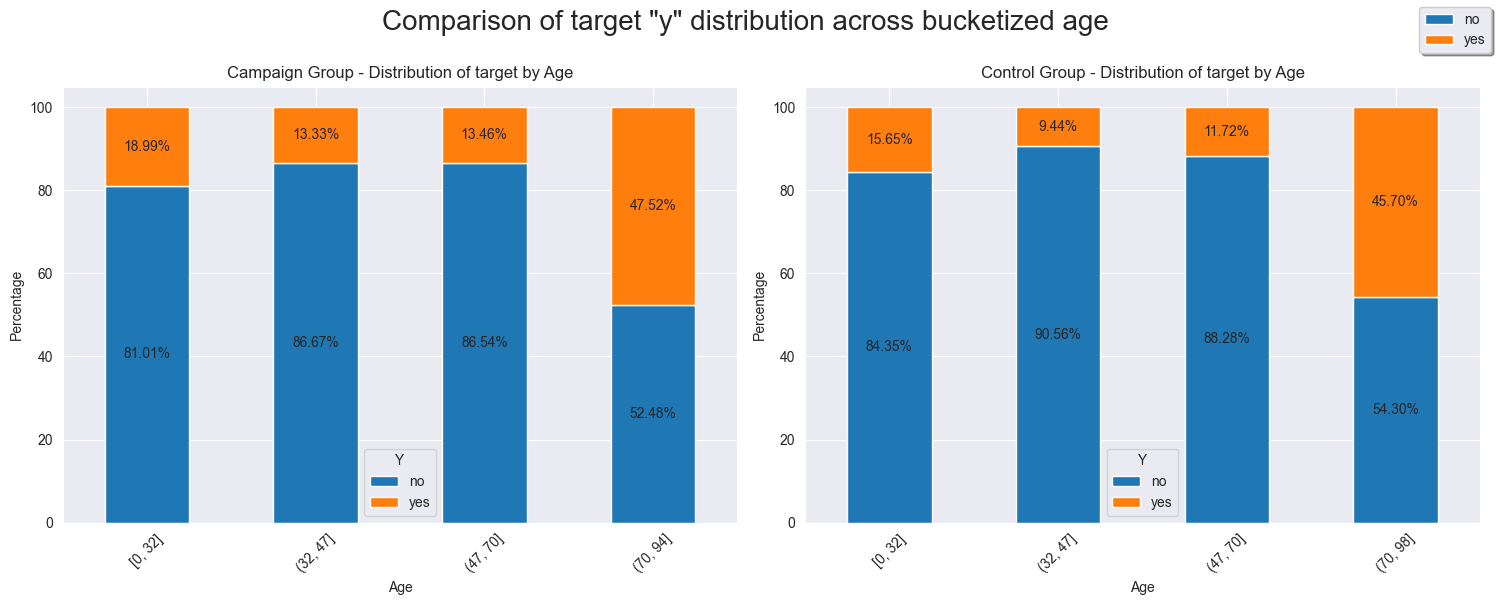

In [96]:
category_distribution_campaign = campaign_group.groupby('age')['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)
category_distribution_control = control_group.groupby('age')['y'].value_counts(normalize=True).mul(100).unstack().fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting for campaign group
ax_campaign = category_distribution_campaign.plot(kind='bar', stacked=True, ax=axes[0])
ax_campaign.set_title("Campaign Group - Distribution of target by Age")
ax_campaign.set_xlabel('Age')
ax_campaign.set_ylabel('Percentage')
ax_campaign.legend(title='Y')
ax_campaign.tick_params(axis='x', rotation=45)

# Add percentage labels on each bar for campaign group
for p in ax_campaign.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax_campaign.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Plotting for control group
ax_control = category_distribution_control.plot(kind='bar', stacked=True, ax=axes[1])
ax_control.set_title("Control Group - Distribution of target by Age")
ax_control.set_xlabel('Age')
ax_control.set_ylabel('Percentage')
ax_control.legend(title='Y')
ax_control.tick_params(axis='x', rotation=45)

# Add percentage labels on each bar for control group
for p in ax_control.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax_control.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

# Add a single legend outside the subplots at the top
handles, labels = ax_campaign.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', shadow=True, prop={'size': 10})

plt.suptitle('Comparison of target "y" distribution across bucketized age', size=20, y=1)
plt.tight_layout()
plt.show()

## Feature Engineering 

In [97]:
df_raw = df_raw.rename(columns={df_raw.columns[0]: 'client_id'})

In [98]:
colnames_to_change = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "nr.employed"]
dict = {}

for col in colnames_to_change:
    new = col.replace(".", "_")
    dict[col] = new
    
df_raw = df_raw.rename(columns = dict)

In [99]:
df_raw['pdays'].replace(999, np.nan, inplace = True)

In [100]:
quantiles = df_raw['pdays'].quantile([0, 0.25, 0.5, 0.75, 1.0])
quantiles

0.00    0.00
0.25    3.00
0.50    6.00
0.75    7.00
1.00   27.00
Name: pdays, dtype: float64

In [101]:
bins = [0, 3, 6, 12, 27]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

df_raw['pdays'] = pd.cut(df_raw['pdays'], bins=bins, labels=labels, right=False)

In [102]:
df_raw['pdays'] = df_raw['pdays'].cat.add_categories('missing').fillna('missing')

In [103]:
age_quantiles = np.quantile(df_raw['age'], [0, 0.25, 0.5, 0.75, 1.0])
print(age_quantiles)

[17. 32. 38. 47. 98.]


In [104]:
bins = [17, 32, 38, 47, 99]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

df_raw['age'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)

In [105]:
df_raw['age'].value_counts()

Q4    10801
Q3    10619
Q2    10438
Q1     9330
Name: age, dtype: int64

In [106]:
df_clean = df_raw.copy()

In [107]:
df_clean.pdays.value_counts()

missing    39674
Q3           634
Q2           603
Q4           175
Q1           102
Name: pdays, dtype: int64

## Modelling


So my idea to approach this problem is to build 2 separate models:
- first, using all the observations and disregarding variables related with the last contact of the current campaign, keeping only varible 'test_control_flag', aiming to improve the performance of future campaigns
- second, using only observations from campaign subset to check which features related with the last contact of the current campaign are impacting the client's decision

In [108]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#### Data preprocessing

In [109]:
predictors_full = df_raw.columns.drop(['y', 'client_id', 'contact', 'month', 'day_of_week', 'duration', 'campaign'])

X_full = df_raw[predictors_full]
y_full = df_raw['y']

y_full.replace({'yes': 1, 'no': 0}, inplace=True)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, stratify=y_full, test_size=0.2, random_state=123)


numeric_features = X_train_full.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_full.select_dtypes(include=['object', 'category']).columns
missing_features = ['cons_price_idx']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


X_train_full = preprocessor.fit_transform(X_train_full)
columns = numeric_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
X_train_full = pd.DataFrame(X_train_full, columns=columns)

X_test_full = preprocessor.transform(X_test_full)
X_test_full = pd.DataFrame(X_test_full, columns=columns)